#1.Получить файл набора данных, прилагающийся к этой работе.

In [ ]:
import pandas as pd
import numpy as np
#Королев С.В. ПИ20-1

#2 Считать файл в pandas DataFrame

In [ ]:
data_set = pd.read_csv('train.csv')
print(type(data_set))
data_set

<class 'pandas.core.frame.DataFrame'>


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#3.Ознакомиться с основными параметрами датасета, используя функции библиотеки pandas, включая следующие данные:
*Количество точек данных (измерений) в наборе

*Количество полей данных (атрибутов)

*Тип данных каждого поля, шкала каждого поля

*Количество отсутствующих значений для каждого поля

*Количество и названия константных и уникальных полей

In [ ]:
data_set.shape[0]

891

In [ ]:
data_set.shape[1]

12

In [ ]:
data_set.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
data_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
data_set.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [ ]:
print([col for col in data_set.columns if len(data_set[col].unique())==1])

[]


#4.Удалить из набора поля, не несущие информативной нагрузки - содержащие уникальные либо константные значения


In [ ]:
#data_set = data_set[data_set.columns[data_set.nunique() != data_set.shape[0]]]
#data_set = data_set[data_set.columns[data_set.nunique() > 1]]

data_set = data_set.drop('PassengerId', axis=1)
data_set = data_set.drop('Name', axis=1)

print(data_set)

     Survived  Pclass     Sex   Age  SibSp  Parch            Ticket     Fare  \
0           0       3    male  22.0      1      0         A/5 21171   7.2500   
1           1       1  female  38.0      1      0          PC 17599  71.2833   
2           1       3  female  26.0      0      0  STON/O2. 3101282   7.9250   
3           1       1  female  35.0      1      0            113803  53.1000   
4           0       3    male  35.0      0      0            373450   8.0500   
..        ...     ...     ...   ...    ...    ...               ...      ...   
886         0       2    male  27.0      0      0            211536  13.0000   
887         1       1  female  19.0      0      0            112053  30.0000   
888         0       3  female   NaN      1      2        W./C. 6607  23.4500   
889         1       1    male  26.0      0      0            111369  30.0000   
890         0       3    male  32.0      0      0            370376   7.7500   

    Cabin Embarked  
0     NaN        S

#5. Заменить возраст пассажиров на год рождения

In [ ]:
data_set['Age'] = 2022 - data_set['Age']
data_set

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,2000.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,1984.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,1996.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,1987.0,1,0,113803,53.1000,C123,S
4,0,3,male,1987.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,1995.0,0,0,211536,13.0000,NaN,S
887,1,1,female,2003.0,0,0,112053,30.0000,B42,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,male,1996.0,0,0,111369,30.0000,C148,C


#6.Переименовать все названия колонок на русском языке

In [ ]:
data_set = data_set.rename(columns={'Survived':'Выжил', 'Pclass':'Пкласс', 'Sex':'Пол', 'Age':'Возраст', 'SibSp':'СибСП', 'Parch':'Парч', 'Ticket':'Билет', 'Fare':'Стоимость', 'Cabin':'Салон', 'Embarked':'Посадочное место'})
data_set

,Выжил,Пкласс,Пол,Возраст,СибСП,Парч,Билет,Стоимость,Салон,Посадочное место
0,0,3,male,2000.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,1984.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,1996.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,1987.0,1,0,113803,53.1000,C123,S
4,0,3,male,1987.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,1995.0,0,0,211536,13.0000,NaN,S
887,1,1,female,2003.0,0,0,112053,30.0000,B42,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,male,1996.0,0,0,111369,30.0000,C148,C


#7. Заменить все отсутствующие данные средним значением (в случае числового поля) либо самым распространенным в категориальных полях.

In [ ]:
"""

data_set['Выжил'] = data_set['Выжил'].fillna(round(data_set['Выжил'].mean(), 0))
data_set['Возраст'] = data_set['Возраст'].fillna(round(data_set['Возраст'].mean(), 0))
data_set['Пкласс'] = data_set['Пкласс'].fillna(round(data_set['Пкласс'].mean(), 0))
data_set['СибСП'] = data_set['СибСП'].fillna(round(data_set['СибСП'].mean(), 0))
data_set['Парч'] = data_set['Парч'].fillna(round(data_set['Парч'].mean(), 0))
data_set['Стоимость'] = data_set['Стоимость'].fillna(round(data_set['Стоимость'].mean(), 0))
data_set['Билет'] = data_set['Билет'].fillna(data_set['Билет'].mode()[len(data_set['Билет'].mode())-1])
data_set['Салон'] = data_set['Салон'].fillna(data_set['Салон'].mode()[len(data_set['Салон'].mode())-1])
data_set['Посадочное место'] = data_set['Посадочное место'].fillna(data_set['Посадочное место'].mode()[len(data_set['Посадочное место'].mode())-1])
data_set['Пол'] = data_set['Пол'].fillna(data_set['Пол'].mode()[len(data_set['Пол'].mode())-1])
"""

num_cols = ['Выжил', 'Возраст', 'Пкласс', 'СибСП', 'Парч', 'Стоимость']
string_cols = ['Билет', 'Салон', 'Посадочное место', 'Пол']

for col_name in range(len(num_cols)):
  data_set[num_cols[col_name]] = data_set[num_cols[col_name]].fillna(round(data_set[num_cols[col_name]].mean(), 0))

for col_name in range(len(string_cols)):
  data_set[string_cols[col_name]] = data_set[string_cols[col_name]].fillna(data_set[string_cols[col_name]].mode()[len(data_set[string_cols[col_name]].mode())-1])

data_set

,Выжил,Пкласс,Пол,Возраст,СибСП,Парч,Билет,Стоимость,Салон,Посадочное место
0,0,3,male,2000.0,1,0,A/5 21171,7.2500,G6,S
1,1,1,female,1984.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,1996.0,0,0,STON/O2. 3101282,7.9250,G6,S
3,1,1,female,1987.0,1,0,113803,53.1000,C123,S
4,0,3,male,1987.0,0,0,373450,8.0500,G6,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,1995.0,0,0,211536,13.0000,G6,S
887,1,1,female,2003.0,0,0,112053,30.0000,B42,S
888,0,3,female,1992.0,1,2,W./C. 6607,23.4500,G6,S
889,1,1,male,1996.0,0,0,111369,30.0000,C148,C


8.Сохранить получившийся набор данных в формате CSV

In [ ]:
data_set.to_csv('rewrited_train.csv',encoding='cp1251', sep=';', na_rep='N/A', header=True, index=False, decimal=',')

#9.Открыть данный файл в программе Microsoft Excel и сохранить в формате .xlsx

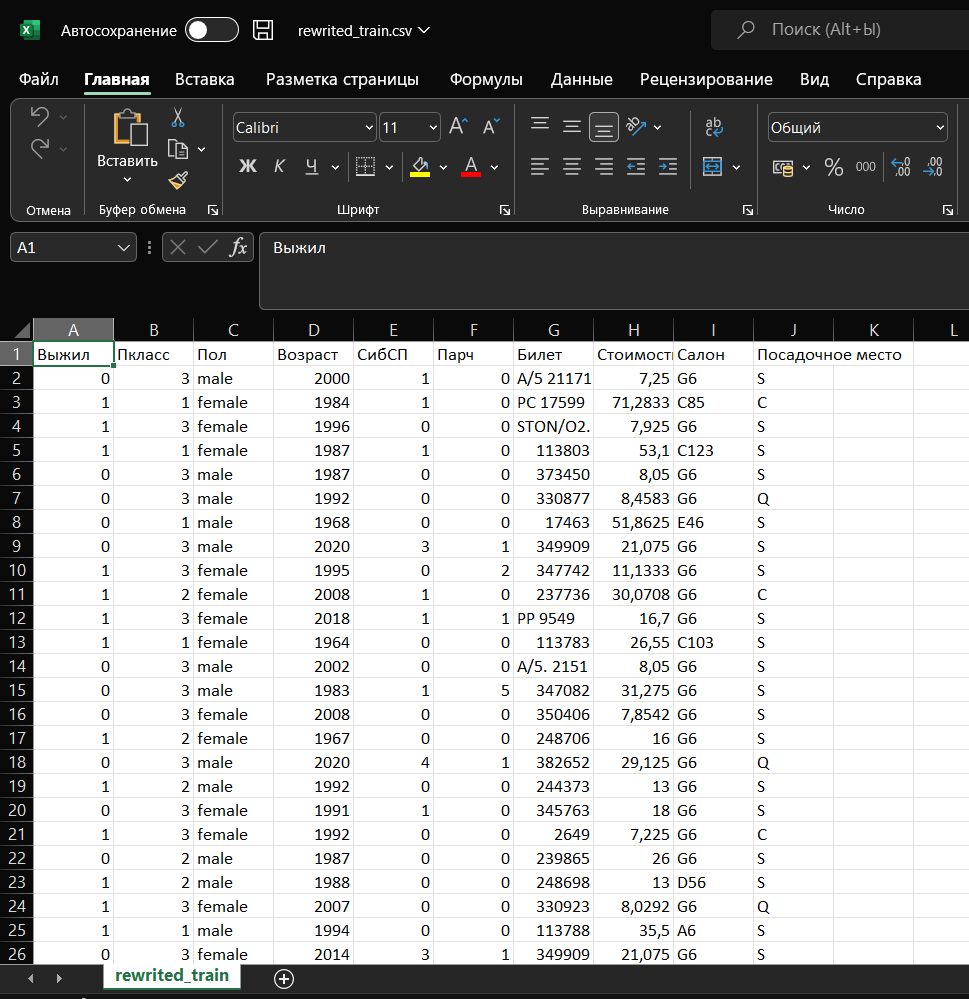

#10.Считать файл .xlsx в новый DataFrame

In [ ]:
new_data_set = pd.read_excel('rewrited_train.xlsx')
new_data_set

,Выжил,Пкласс,Пол,Возраст,СибСП,Парч,Билет,Стоимость,Салон,Посадочное место
0,0,3,male,2000.0,1,0,A/5 21171,7.2500,G6,S
1,1,1,female,1984.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,1996.0,0,0,STON/O2. 3101282,7.9250,G6,S
3,1,1,female,1987.0,1,0,113803,53.1000,C123,S
4,0,3,male,1987.0,0,0,373450,8.0500,G6,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,1995.0,0,0,211536,13.0000,G6,S
887,1,1,female,2003.0,0,0,112053,30.0000,B42,S
888,0,3,female,1992.0,1,2,W./C. 6607,23.4500,G6,S
889,1,1,male,1996.0,0,0,111369,30.0000,C148,C
